Here we use the `librosa library` extract various features of an audio signal, including the tempo, rhythm, and other mechanical components. At the end, we ship it off to a database.

In [38]:
import librosa
import warnings
import pandas as pd
import IPython.display as ipyd
import matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

# Suppress the warning message
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")


import ctypes

# Load the C library
lib = ctypes.cdll.LoadLibrary("libc.so.6")

# Declare the C function
lib.printf("Cython activated!\n")

# Load the audio file
y, sr = librosa.load('/content/drive/MyDrive/Datasets/Music_songs/Oxlade-Ku-Lo-Sa-New-Song.mp3')

# Extract the tempo
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print("Tempo of this audio is:: {:.2f} BPM".format(tempo))

# Extract the duration
duration = librosa.get_duration(y=y, sr=sr)
print("Audio duration is:: {:.2f} mins/s".format(duration))


Tempo of this audio is:: 92.29 BPM
Audio duration is:: 166.11 mins/s


In [39]:
# Play the audio file to hear its sound.

y, sr = librosa.load('/content/drive/MyDrive/Datasets/Music_songs/Oxlade-Ku-Lo-Sa-New-Song.mp3')
ipyd.Audio(y, rate=sr)



Let's visualize how the Tempo looks!

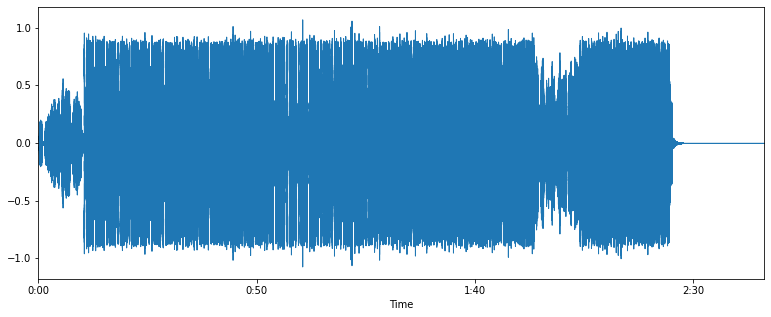

In [44]:
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/Datasets/Music_songs/Oxlade-Ku-Lo-Sa-New-Song.mp3'

# Load the audio file and compute the tempo
y, sr = librosa.load(filename)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# Plot the audio waveform
librosa.display.waveplot(y, sr=sr)

# Overlay the tempo on top of the waveform
times = librosa


Let's then zoom into a part of the audio file to study the tempogram closely.

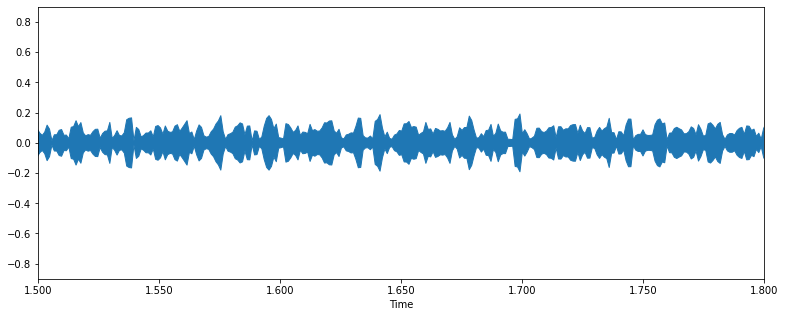

In [47]:
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/Datasets/Music_songs/Oxlade-Ku-Lo-Sa-New-Song.mp3'

# Load the audio file and compute the tempo
y, sr = librosa.load(filename)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# Plot the audio waveform
librosa.display.waveplot(y, sr=sr)

# Overlay the tempo on top of the waveform
times = librosa.frames_to_time(range(len(beats)), sr=sr)
plt.plot(times, tempo.repeat(len(times)))

# Set the x-axis and y-axis limits
start_time = 1.5
end_time = 1.8
min_tempo = -0.9
max_tempo = 0.9
plt.xlim(start_time, end_time)
plt.ylim(min_tempo, max_tempo)

plt.show()

In [26]:
# Extract the tonnetz features
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
# Convert the tonnetz matrix to a dataframe
df = pd.DataFrame(tonnetz)

Print the tonnetz to see the full array.

In [54]:
print(df)

       0         1         2         3         4         5         6     \
0  0.021384 -0.038009 -0.099721 -0.176163 -0.286676 -0.422782 -0.530694   
1  0.034425  0.032113  0.012705 -0.016631 -0.051362 -0.088201 -0.103846   
2  0.129562  0.108541  0.080738  0.063008  0.052014  0.066786  0.095151   
3 -0.049516 -0.055111 -0.113292 -0.186303 -0.258681 -0.321584 -0.361455   
4 -0.032762 -0.006224  0.017261  0.049977  0.086544  0.127888  0.157489   
5  0.043937  0.041225  0.037028  0.040235  0.047450  0.063154  0.080959   

       7         8         9     ...  7144  7145  7146  7147  7148  7149  \
0 -0.591840 -0.622169 -0.633018  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1 -0.104237 -0.107633 -0.109668  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.115454  0.126405  0.128858  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3 -0.389548 -0.405314 -0.415426  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.169415  0.178225  0.184196  ...   0.0   0.0   0.0   0.0   0.0   0.0   
5  0.090593  0.095

Below, we attempt to use the `sklearn` library to train a simple machine learning model to predict the musical key of an audio signal based on its tonnetz features.

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the training data
#df = pd.read_csv("training_data.csv")   
df = pd.DataFrame(tonnetz)

# Extract the features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest classifier on the data
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Test the classifier on the test set
accuracy = clf.score(X_test, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))
